# Prediction of food allergy percetanges

Load machine learning library scikit-learn

In [1]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os.path as osp
import gc

Define a function that will receive data as input and will return a support vector machine trained with the best hiperparameters for that data.

In [2]:
def get_model(x, y):
	regr = SVR()
	pipe = Pipeline(steps=[('reg', regr)])
	param_grid = {
		'reg__kernel':('linear', 'rbf'),
		'reg__C': [0.01, 0.1, 1, 10],
		'reg__epsilon': [0.1, 0.2, 0.4, 0.5, 0.8, 1., 1.5, 2, 3],
		'reg__gamma': ['auto', 'scale'],
	}
	search = GridSearchCV(pipe, param_grid, iid=False, cv=5,
		return_train_score=False, n_jobs = 4)
	search.fit(x, y)
	return search.best_estimator_

Define a function that loads the data. Source of data https://www.cdc.gov/nchs/hus/contents2017.htm#035

In [3]:
def read(file_name):
	data = pd.read_csv(file_name, sep = '\t')
	x = np.array([[float(year)] for year in list(data)])
	y = np.array([[year] for year in np.array(data).reshape(-1)]).reshape(-1, )
	return x, y

In [4]:
data_root = '../data/machine_learning'
file_names = ['black_african_american.tsv', 'female.tsv', 'hispanic_latino.tsv', 'male.tsv', 'under_18_years.tsv', 'white.tsv']
names = ['black african american', 'female ', 'hispanic latino', 'male', 'under 18 years', 'white']

Define the years we want to predict food allergy percentages

In [5]:
query = np.array([[2018], [2019], [2020]]).reshape(-1,1)

Predict food allergy percentages:

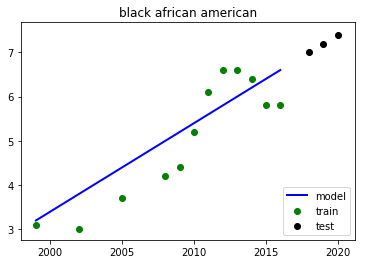

7.00 percentage of black african american population will have food allergy in 2018
7.20 percentage of black african american population will have food allergy in 2019
7.40 percentage of black african american population will have food allergy in 2020


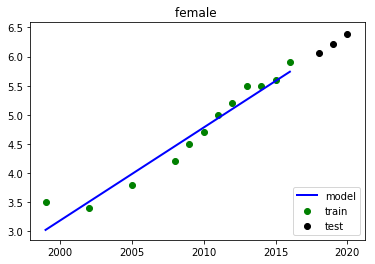

6.06 percentage of female  population will have food allergy in 2018
6.22 percentage of female  population will have food allergy in 2019
6.38 percentage of female  population will have food allergy in 2020


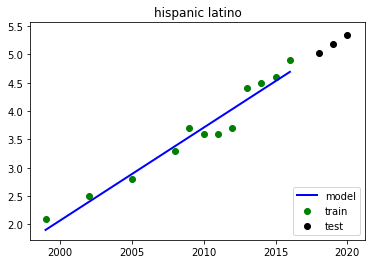

5.02 percentage of hispanic latino population will have food allergy in 2018
5.19 percentage of hispanic latino population will have food allergy in 2019
5.35 percentage of hispanic latino population will have food allergy in 2020


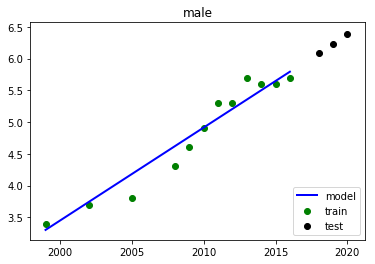

6.09 percentage of male population will have food allergy in 2018
6.23 percentage of male population will have food allergy in 2019
6.38 percentage of male population will have food allergy in 2020


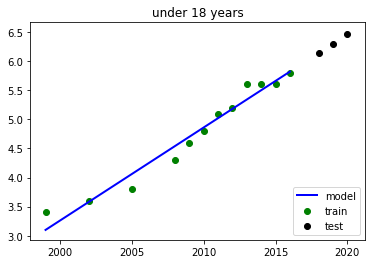

6.14 percentage of under 18 years population will have food allergy in 2018
6.30 percentage of under 18 years population will have food allergy in 2019
6.46 percentage of under 18 years population will have food allergy in 2020


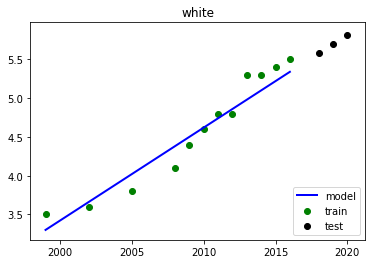

5.58 percentage of white population will have food allergy in 2018
5.70 percentage of white population will have food allergy in 2019
5.82 percentage of white population will have food allergy in 2020


In [6]:
for fn, n in zip(file_names, names):
    x, y = read(osp.join(data_root, fn))

    model = get_model(x, y)
    y_model = model.predict(x)
    y_query = model.predict(query)

    fig =plt.figure()
    plt.title(n)
    plt.scatter(x, y,  color='green', label = 'train')
    plt.scatter(query, y_query,  color='black', label = 'test')
    plt.plot(x, y_model, color='blue', linewidth=2, label = 'model')
    plt.legend(loc = 'lower right')

    plt.show()
    for q, pq in zip(query, y_query):
        print("{:.2f} percentage of {} population will have food allergy in {}".format(pq, n, q[0]))
